# Impact of Discounted ARR on Churn Rate for Customer

# Importing Libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset 

In [2]:
df = pd.read_csv("../staging/data_set/master_dataset.csv")

# Formatting Date

In [3]:
df["score_date"] = pd.to_datetime(df["score_date"], errors="coerce")

df["year_week"] = df["score_date"].dt.to_period("W").astype(str)

df.sort_values(["id", "year_week"], inplace=True)


# Visualization based on discount arr

C:\Users\sekha\AppData\Local\Temp\ipykernel_25264\2988693958.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='discount_status', y='churn_flag', data=discount_churn,
C:\Users\sekha\AppData\Local\Temp\ipykernel_25264\2988693958.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


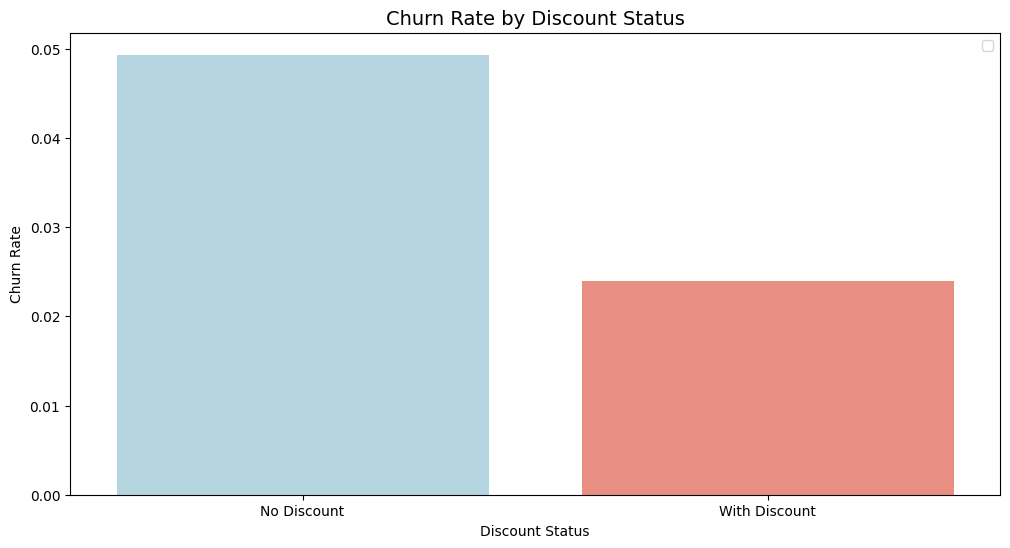

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create discount flag and absolute discount amount columns
df['has_discount'] = df['discount_arr_usd'] < 0
df['discount_abs'] = np.abs(df['discount_arr_usd'])

# Convert boolean to string for proper palette mapping
df['discount_status'] = df['has_discount'].map({True: 'With Discount', False: 'No Discount'})

# 1. Discount Presence vs Churn
plt.figure(figsize=(12, 6))
discount_churn = df.groupby('discount_status')['churn_flag'].mean().reset_index()
ax = sns.barplot(x='discount_status', y='churn_flag', data=discount_churn,
                palette={'No Discount': 'lightblue', 'With Discount': 'salmon'},
                order=['No Discount', 'With Discount'])  # Ensures consistent ordering

plt.title('Churn Rate by Discount Status', fontsize=14)
plt.xlabel('Discount Status')
plt.ylabel('Churn Rate')

plt.legend()
plt.show()

C:\Users\sekha\AppData\Local\Temp\ipykernel_25264\3104891486.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(index='product_counts',


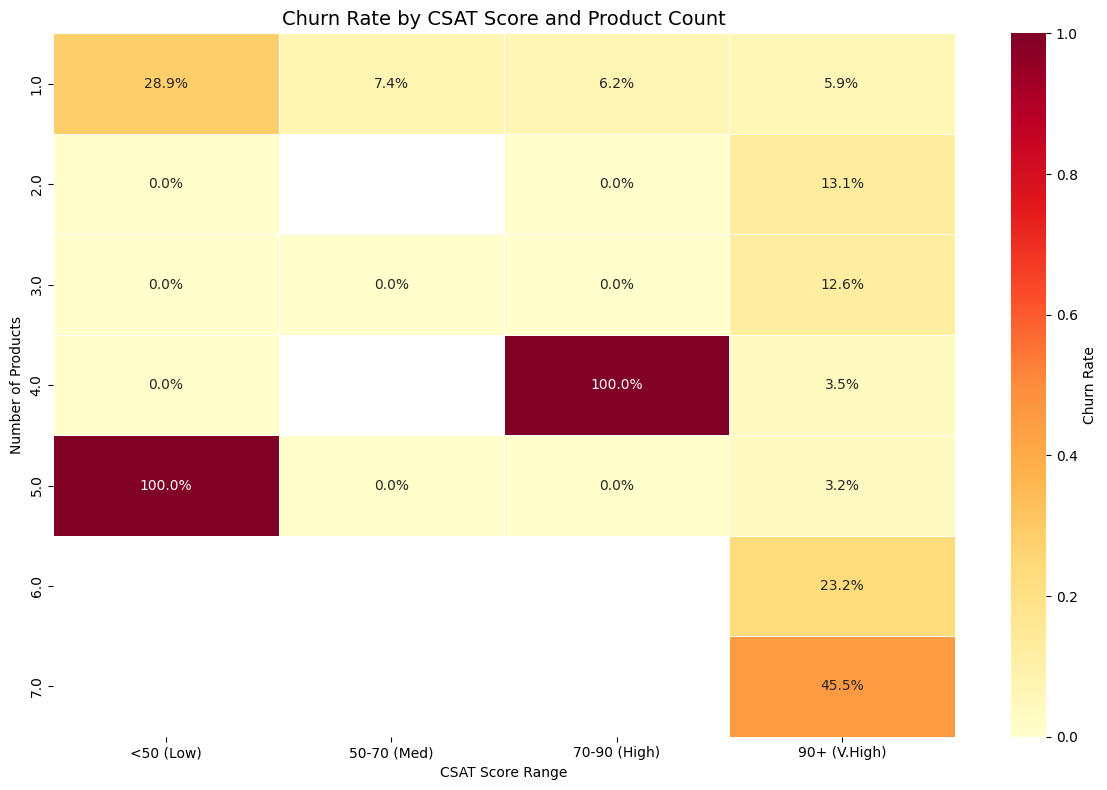

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Create CSAT score buckets
df['csat_bucket'] = pd.cut(df['csat_score'], 
                          bins=[0, 50, 70, 90, np.inf],
                          labels=['<50 (Low)', '50-70 (Med)', '70-90 (High)', '90+ (V.High)'])

# 2. Combined analysis of CSAT and Product Count
plt.figure(figsize=(12, 8))

# Create a 2D grid of product counts vs CSAT buckets
heatmap_data = df.pivot_table(index='product_counts', 
                             columns='csat_bucket', 
                             values='churn_flag', 
                             aggfunc='mean')

sns.heatmap(heatmap_data, annot=True, fmt=".1%", cmap="YlOrRd", 
            linewidths=.5, cbar_kws={'label': 'Churn Rate'})
plt.title('Churn Rate by CSAT Score and Product Count', fontsize=14)
plt.xlabel('CSAT Score Range')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()

# Regional Churn Patterns

C:\Users\sekha\AppData\Local\Temp\ipykernel_25264\2722744457.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Churn Rate", data=region_churn_df, palette="coolwarm")


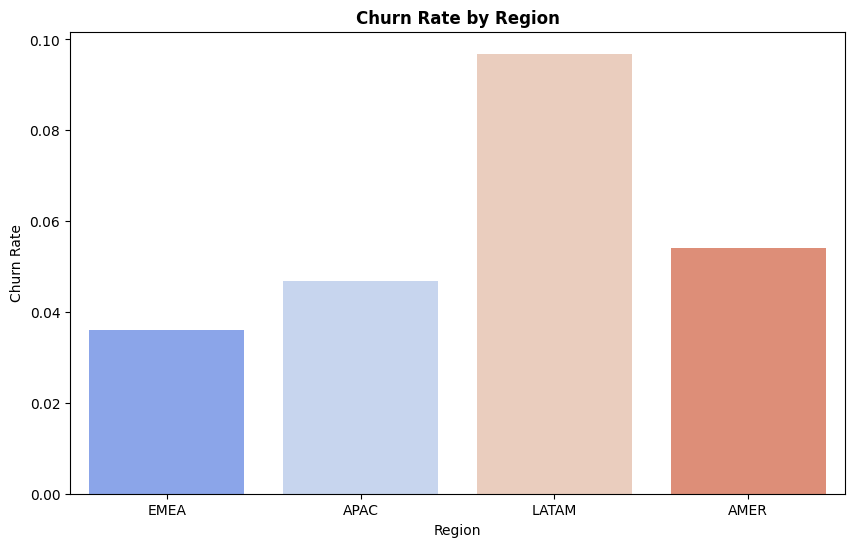

In [22]:
# Calculate churn rate for each region
region_churn = {
    "EMEA": df[df["region_emea"] == 1]["churn_flag"].mean(),
    "APAC": df[df["region_apac"] == 1]["churn_flag"].mean(),
    "LATAM": df[df["region_latam"] == 1]["churn_flag"].mean(),
    "AMER": df[df["region_amer"] == 1]["churn_flag"].mean(),
}

# Convert to DataFrame
region_churn_df = pd.DataFrame(list(region_churn.items()), columns=["Region", "Churn Rate"])

# Plot churn rate by region
plt.figure(figsize=(10, 6))
sns.barplot(x="Region", y="Churn Rate", data=region_churn_df, palette="coolwarm")

plt.title("Churn Rate by Region", fontweight="bold")
plt.xlabel("Region")
plt.ylabel("Churn Rate")
plt.show()


# Product Type Vulnerability

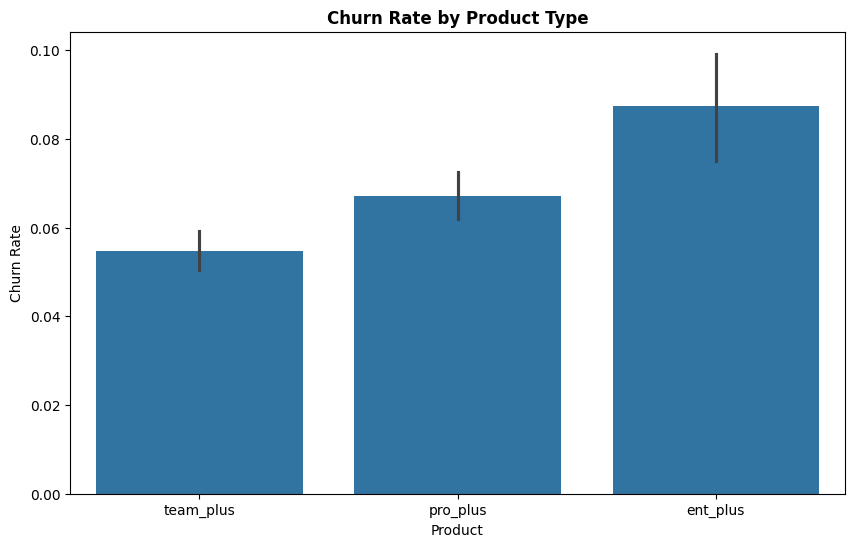

In [ ]:
product_melt = df.melt(id_vars=['churn_flag'], 
                      value_vars=['team_plus','pro_plus','ent_plus'],
                      var_name='product', value_name='uses_product')

plt.figure(figsize=(10,6))
sns.barplot(x='product', y='churn_flag', 
           data=product_melt[product_melt['uses_product']==1])
plt.title('Churn Rate by Product Type', fontweight='bold')
plt.xlabel('Product')
plt.ylabel('Churn Rate')
plt.show()

# Billing Health

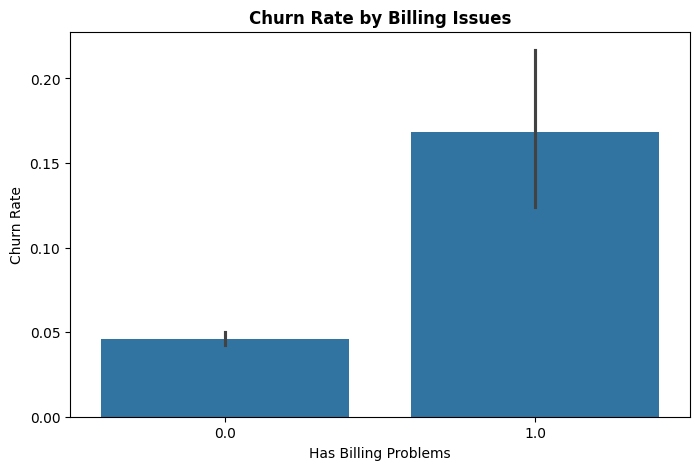

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(x='billing_dunning_not_ok', y='churn_flag', data=df)
plt.title('Churn Rate by Billing Issues', fontweight='bold')
plt.xlabel('Has Billing Problems')
plt.ylabel('Churn Rate')
plt.show()

# Segment Analysis

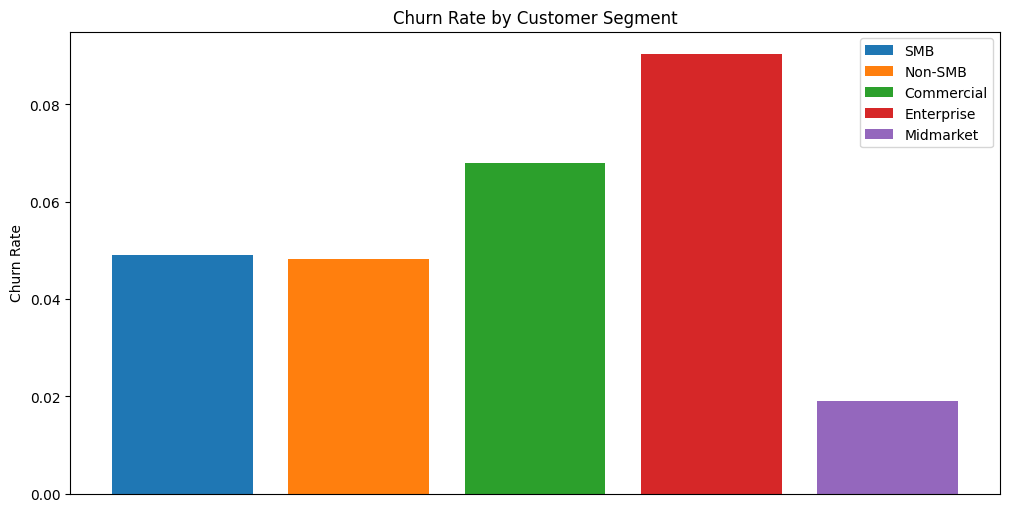

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Preparation
# Convert date and create tenure buckets
df['score_date'] = pd.to_datetime(df['score_date'])
df['tenure_years'] = df['customer_age_quarters'] / 4
df['tenure_bucket'] = pd.cut(df['tenure_years'],
                            bins=[0, 1, 2, 3, 5, 10, np.inf],
                            labels=['<1', '1-2', '2-3', '3-5', '5-10', '10+'])

# 2. Segment Analysis
segment_cols = ['segment_smb','segment_non_smb','segment_commercial',
               'segment_enterprise','segment_midmarket']
segment_names = ['SMB','Non-SMB','Commercial','Enterprise','Midmarket']

plt.figure(figsize=(12,6))
for i, col in enumerate(segment_cols):
    segment_churn = df.groupby(col)['churn_flag'].mean().reset_index()
    plt.bar(i, segment_churn.loc[1, 'churn_flag'], 
            label=f"{segment_names[i]}")
plt.xticks([])
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Customer Segment')
plt.legend()
plt.show()


# CSAT

C:\Users\sekha\AppData\Local\Temp\ipykernel_25264\1984269870.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  csat_churn = df.groupby("csat_bucket")["churn_flag"].mean().reset_index()
C:\Users\sekha\AppData\Local\Temp\ipykernel_25264\1984269870.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="csat_bucket", y="churn_flag", data=csat_churn, palette="viridis")


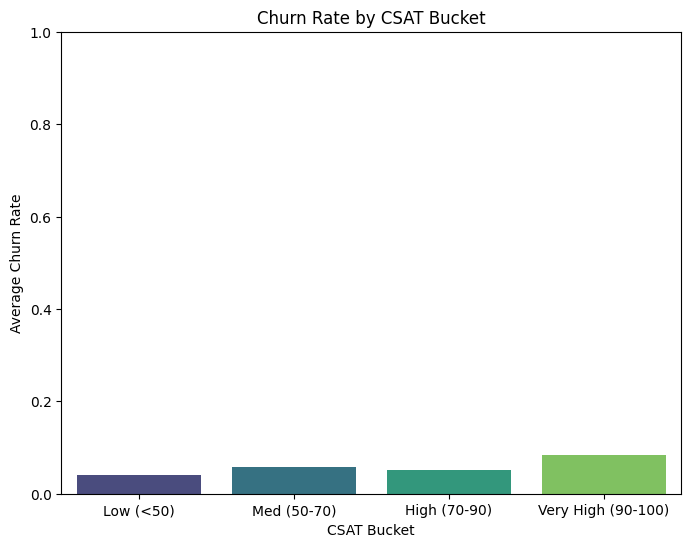

In [10]:
# ---- CSAT Visualization ----
# Create buckets for CSAT scores. (Adjust bins if your scoring scale differs.)
# Here we assume a 0-10 scale.
csat_bins = [0, 50, 70, 90, 100]
csat_labels = ["Low (<50)", "Med (50-70)", "High (70-90)", "Very High (90-100)"]
df["csat_bucket"] = pd.cut(
    df["csat_score"], bins=csat_bins, labels=csat_labels, include_lowest=True
)

# Calculate the average churn rate for each CSAT bucket
csat_churn = df.groupby("csat_bucket")["churn_flag"].mean().reset_index()

# Plot the churn rate by CSAT bucket
plt.figure(figsize=(8, 6))
sns.barplot(x="csat_bucket", y="churn_flag", data=csat_churn, palette="viridis")
plt.title("Churn Rate by CSAT Bucket")
plt.xlabel("CSAT Bucket")
plt.ylabel("Average Churn Rate")
plt.ylim(0, 1)  # Churn rate as a proportion between 0 and 1
plt.show()

## NPS


C:\Users\sekha\AppData\Local\Temp\ipykernel_25264\4034385954.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nps_churn = df.groupby("nps_bucket")["churn_flag"].mean().reset_index()
C:\Users\sekha\AppData\Local\Temp\ipykernel_25264\4034385954.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="nps_bucket", y="churn_flag", data=nps_churn, palette="magma")


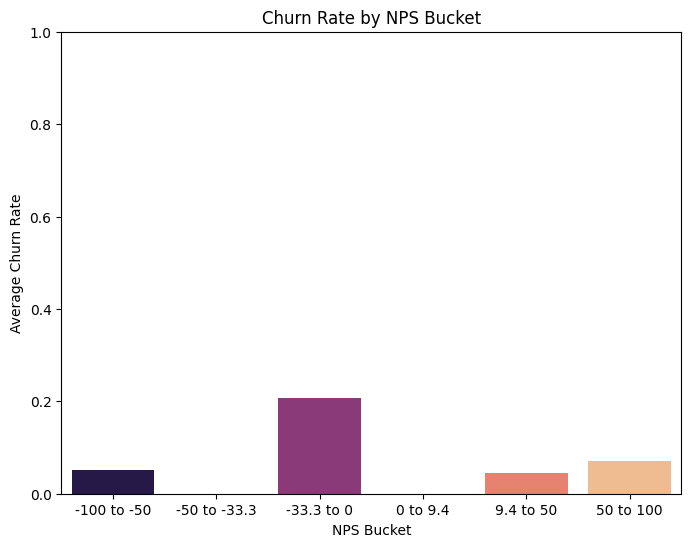

In [11]:
nps_bins = [-100, -50, -33.3, 0, 9.401423027, 50, 100]
nps_labels = [ "-100 to -50", "-50 to -33.3", "-33.3 to 0", "0 to 9.4", "9.4 to 50", "50 to 100" ]
df["nps_bucket"] = pd.cut(
    df["nps_score"], bins=nps_bins, labels=nps_labels, include_lowest=True
)

# Calculate the average churn rate for each NPS bucket
nps_churn = df.groupby("nps_bucket")["churn_flag"].mean().reset_index()

# Plot the churn rate by NPS bucket
plt.figure(figsize=(8, 6))
sns.barplot(x="nps_bucket", y="churn_flag", data=nps_churn, palette="magma")
plt.title("Churn Rate by NPS Bucket")
plt.xlabel("NPS Bucket")
plt.ylabel("Average Churn Rate")
plt.ylim(0, 1)
plt.show()

# Customer age quarters

C:\Users\sekha\AppData\Local\Temp\ipykernel_25264\1554999076.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_groups = df.groupby('tenure_bucket')['churn_flag'].mean().reset_index()


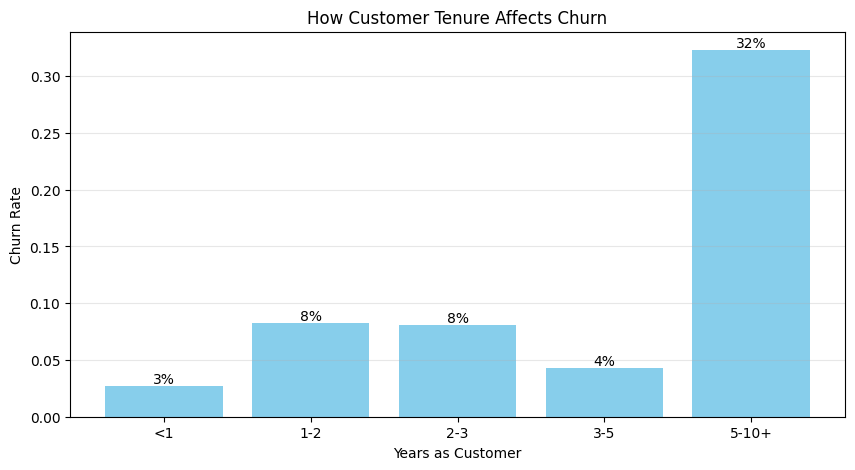

In [17]:
df['tenure_years'] = df['customer_age_quarters'] / 4
df['tenure_bucket'] = pd.cut(df['tenure_years'],
                            bins=[0, 1, 2, 3, 5, 10],
                            labels=['<1', '1-2', '2-3', '3-5', '5-10+'])

# Group data by tenure buckets and calculate churn rate
tenure_groups = df.groupby('tenure_bucket')['churn_flag'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10,5))
bars = plt.bar(tenure_groups['tenure_bucket'], tenure_groups['churn_flag'], color='skyblue')

# Add simple labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0%}',  # Shows as percentage (e.g., 15%)
             ha='center', va='bottom')

plt.title('How Customer Tenure Affects Churn')
plt.xlabel('Years as Customer')
plt.ylabel('Churn Rate')
plt.grid(axis='y', alpha=0.3)
plt.show()

# CRM Industry Analysis

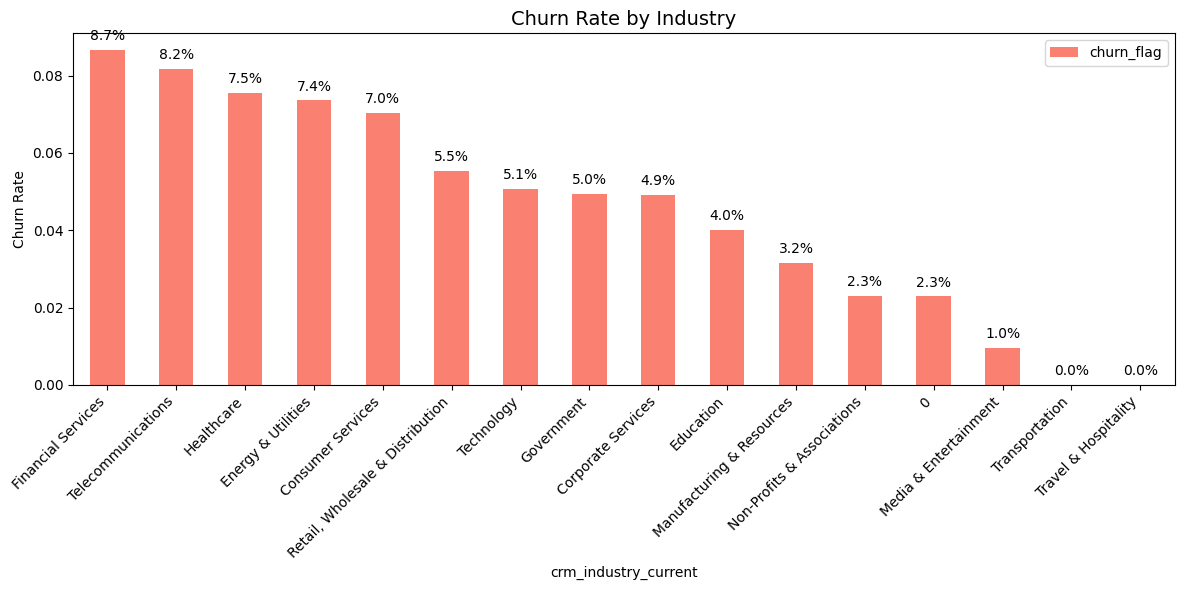

In [13]:

plt.figure(figsize=(12,6))
industry_churn = df.groupby('crm_industry_current')['churn_flag'].mean().sort_values(ascending=False)
ax = industry_churn.plot(kind='bar', color='salmon')
plt.title('Churn Rate by Industry', fontsize=14)
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Add percentages
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0,10), 
                textcoords='offset points')
plt.tight_layout()
plt.show()

# Sales Assisted Analysis

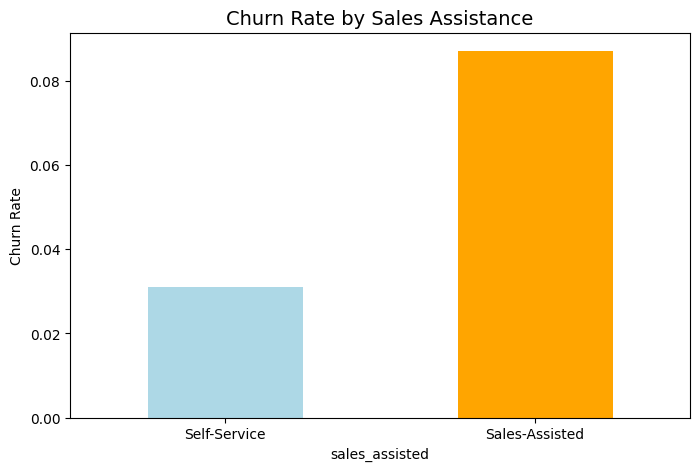

In [14]:
plt.figure(figsize=(8,5))
sales_churn = df.groupby('sales_assisted')['churn_flag'].mean()
ax = sales_churn.plot(kind='bar', color=['lightblue', 'orange'])
plt.title('Churn Rate by Sales Assistance', fontsize=14)
plt.xticks([0,1], ['Self-Service', 'Sales-Assisted'], rotation=0)
plt.ylabel('Churn Rate')

plt.show()

# Combined View: Industry + Sales Assistance

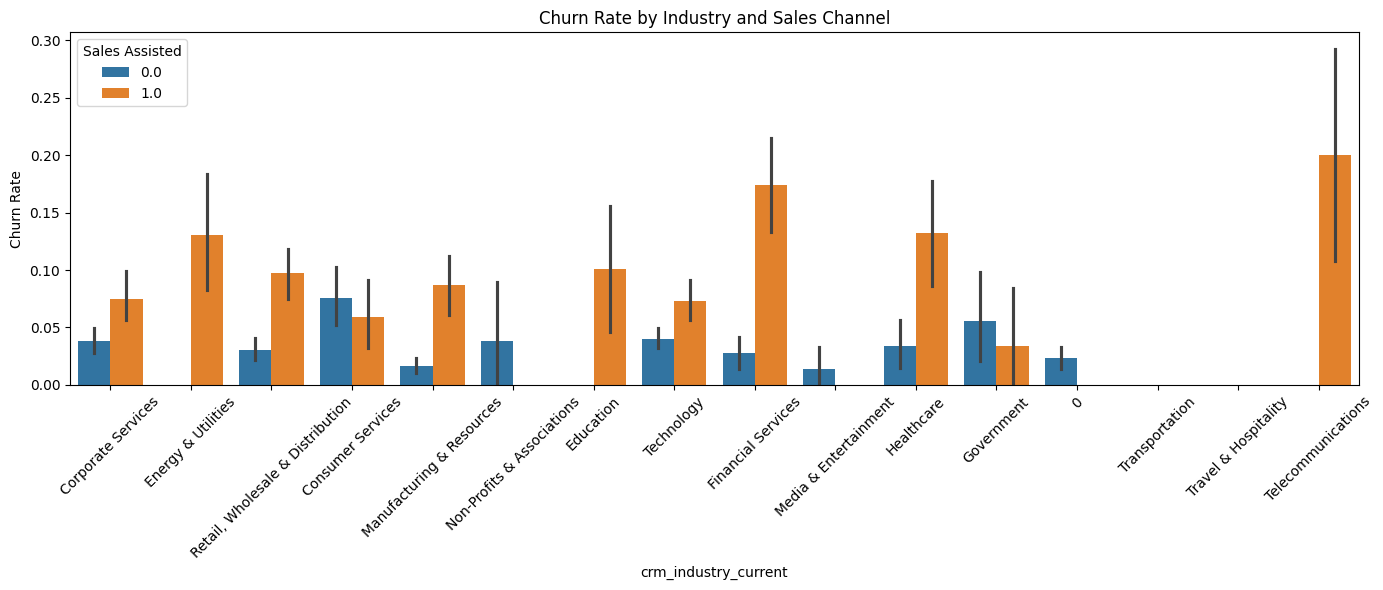

In [15]:

plt.figure(figsize=(14,6))
sns.barplot(x='crm_industry_current', y='churn_flag', hue='sales_assisted', 
           data=df, estimator=lambda x: sum(x)/len(x))
plt.title('Churn Rate by Industry and Sales Channel')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.legend(title='Sales Assisted')
plt.tight_layout()
plt.show()

#  Seat Utilization

Overall Churn Rate: 4.8%



C:\Users\sekha\AppData\Local\Temp\ipykernel_25264\4104591403.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn_status', y='seat_utilization_change', data=df,


Text(0, 0.5, 'Seat Utilization Change')

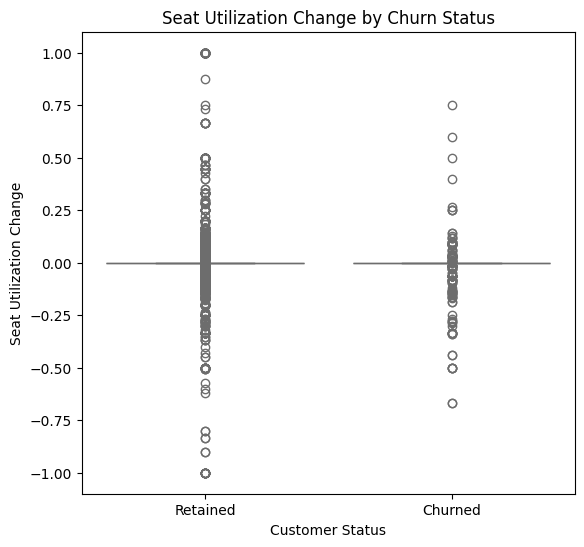

In [68]:

# 1. Seat Utilization Change Calculation
df['seat_utilization_change'] = df['seat_utilization'] - df['seat_utilization_M_before']

# Convert churn_flag to string for proper palette mapping
df['churn_status'] = df['churn_flag'].map({0: 'Retained', 1: 'Churned'})

# 2. Overall Churn Rate
churn_rate = df['churn_flag'].mean()
print(f"Overall Churn Rate: {churn_rate:.1%}\n")

# 3. Seat Utilization Change vs Churn
plt.figure(figsize=(14, 6))

# Plot 1: Distribution of utilization changes by churn status
plt.subplot(1, 2, 1)
sns.boxplot(x='churn_status', y='seat_utilization_change', data=df,
           palette={'Retained': 'lightblue', 'Churned': 'salmon'})
plt.title('Seat Utilization Change by Churn Status')
plt.xlabel('Customer Status')
plt.ylabel('Seat Utilization Change')




# Agent utilization

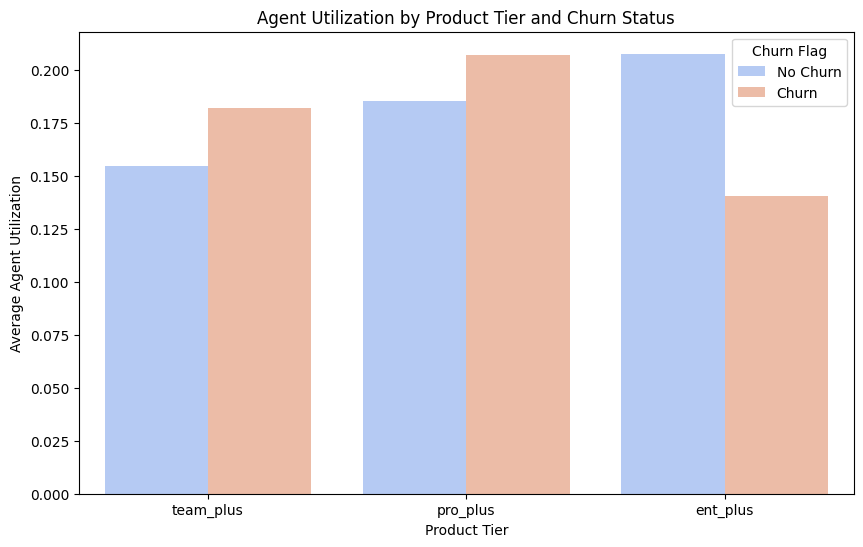

In [66]:
# Prepare data for plotting
df_melted = df.melt(id_vars=['agent_utilization', 'churn_flag'], 
                     value_vars=['team_plus', 'pro_plus', 'ent_plus'], 
                     var_name='product_tier', value_name='tier_value')

# Filter for customers who actually subscribed to the tier
df_melted = df_melted[df_melted['tier_value'] > 0]

# Plot barplot instead of boxplot
plt.figure(figsize=(10, 6))
sns.barplot(x='product_tier', y='agent_utilization', hue='churn_flag', 
            data=df_melted, palette='coolwarm', errorbar=None)
plt.xlabel('Product Tier')
plt.ylabel('Average Agent Utilization')
plt.title('Agent Utilization by Product Tier and Churn Status')
plt.legend(title='Churn Flag', labels=['No Churn', 'Churn'])
plt.show()
